# Calculating Market Risk

In this activity, you’ll calculate the beta for three stocks to identify the most conservative investment. 

Instructions:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to import `tech_data.csv` into a Pandas DataFrame.

3. Use the Pandas `pct_change` function together with the `dropna` function to calculate the daily returns for each stock in the DataFrame.

4. Use the Pandas `var` function to calculate the variance for all the stocks in the DataFrame.

5. Use the Pandas `var` function to calculate the variance for just the S&P 500. (You’ll use this in the beta calculation.)

6. Use the Pandas `cov` function to calculate the covariance between each social media stock (FB, TWTR, and SNAP) and the market (S&P 500).

7. Calculate the beta value for each of the three social media stocks by dividing the covariance of the stock by the variance of the market.

8. Answer the following question: Based on your calculations of the betas, which of the three social media stocks presents the most conservative investment?

References:

[Pandas var function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html)

[Pandas cov function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html)




## Step 1: Import the required libraries and dependencies.

In [8]:
# Import Pandas library 
# YOUR CODE HERE
import pandas as pd
# Import the Path module from the pathlib library
# YOUR CODE HERE
from pathlib import Path
# Import the matplotlib inline dependency
# YOUR CODE HERE
%matplotlib inline

## Step 2: Use the `read_csv` function and the `Path` module to import `tech_data.csv` into a Pandas DataFrame.

In [10]:
# Using the read_csv function and the Path module, read in the "tech_data.csv" file from the Resources folder
# Set the "Date" as the index column 
# Be sure to set the DatetimeIndex using the parse_dates and infer_datetime_format parameters
tech_df = pd.read_csv(Path("/Users/pete/Documents/Fintech-Workspace/M4/01-Calculating_Market_Risk/Resources/tech_data.csv"),
                     index_col="Date",
                     parse_dates = True,
                     infer_datetime_format = True
                     )
# Review the 'tech_df' DataFrame with both the 'head' & 'tail' functions
display(tech_df.head())
display(tech_df.tail())
    

,FB,TWTR,SNAP,S&P 500
Date,,,,
2017-03-02,136.76,15.79,24.48,2381.919922
2017-03-03,137.17,15.75,27.09,2383.120117
2017-03-06,137.42,15.56,23.77,2375.310059
2017-03-07,137.30,15.18,21.44,2368.389893
2017-03-08,137.72,15.24,22.81,2362.979980


,FB,TWTR,SNAP,S&P 500
Date,,,,
2019-05-13,181.54,36.59,10.11,2811.870117
2019-05-14,180.73,36.93,10.49,2834.409912
2019-05-15,186.27,37.90,10.66,2850.959961
2019-05-16,186.99,38.30,11.42,2876.320068
2019-05-17,185.30,37.50,11.49,2859.530029


## Step 3: Use the Pandas `pct_change` function together with the `dropna` function to calculate the daily returns for each stock in the DataFrame.

In [12]:
# Using the Pandas pct_change function in conjunction with the dropna function, create the tech daily returns DataFrame
tech_daily_returns = tech_df.pct_change().dropna()

# Review the first 5 rows of the tech daily returns DataFrame
# YOUR CODE HERE
tech_daily_returns.head()

,FB,TWTR,SNAP,S&P 500
Date,,,,
2017-03-03,0.002998,-0.002533,0.106618,0.000504
2017-03-06,0.001823,-0.012063,-0.122554,-0.003277
2017-03-07,-0.000873,-0.024422,-0.098023,-0.002913
2017-03-08,0.003059,0.003953,0.063899,-0.002284
2017-03-09,0.003776,-0.001312,-0.004384,0.000800


## Step 4: Use the Pandas `var` function to calculate the variance for all the stocks in the DataFrame.

In [13]:
# Using the Pandas var function, calculate the variance of all stocks in the tech daily returns DataFrame
# YOUR CODE HERE
tech_daily_returns.var()

FB         0.000374
TWTR       0.000982
SNAP       0.001745
S&P 500    0.000070
dtype: float64

## Step 5: Use the Pandas `var` function to calculate the variance for just the S&P 500. (You’ll use this in the beta calculation.)

In [24]:
# Using the Pandas var function, generate the variance for just the S&P 500
# The S&P 500 is being used as the proxy for the market throughout this activity
variance_market = tech_daily_returns['S&P 500'].var()

# View the variance of the market
# YOUR CODE HERE
variance_market
print(f"Market Variance:  {variance_market:6f}")

Market Variance:  0.000070


## Step 6: Use the Pandas `cov` function to calculate the covariance between each social media stock (FB, TWTR, and SNAP) and the market (S&P 500).

In [25]:
# Using the Pandas cov function, calculate the covariance between the daily returns of FB and the daily returns of the S&P 500
fb_covariance = tech_daily_returns['FB'].cov(tech_daily_returns['S&P 500'])

# View the FB covariance
# YOUR CODE HERE
print(f"FB Covariance{fb_covariance:6f}")


FB Covariance0.000090


In [27]:
# Using the Pandas cov function, calculate the covariance between the daily returns of TWTR and the daily returns of the S&P 500
twtr_covariance =  tech_daily_returns['TWTR'].cov(tech_daily_returns['S&P 500'])
# View the TWTR covariance
# YOUR CODE HERE
print(f"TWTR Covariance{twtr_covariance:6f}")


TWTR Covariance0.000106


In [29]:
# Using the Pandas cov function, calculate the covariance between the daily returns of SNAP and the daily returns of the S&P 500
snap_covariance = tech_daily_returns['SNAP'].cov(tech_daily_returns['S&P 500'])

# View the SNAP covariance
# YOUR CODE HERE
print(f"TWTR Covariance{snap_covariance:6f}")

TWTR Covariance0.000078


## Step 7: Calculate the beta value for each of the three social media stocks by dividing the covariance of the stock by the variance of the market.

In [37]:
# Calculate beta of FB by dividing the covariance of FB by the variance of the S&P 500
#fb_beta = fb_covariance / tech_daily_returns['FB'].var()

fb_beta = tech_daily_returns['FB'].cov(tech_daily_returns['S&P 500']) / tech_daily_returns['S&P 500'].var()
# Print the beta of FB
# YOUR CODE HERE
fb_beta

1.2815248952670948

In [38]:
# Calculate beta of TWTR by dividing the covariance of TWTR by the variance of the S&P 500
twtr_beta = tech_daily_returns['TWTR'].cov(tech_daily_returns['S&P 500']) / tech_daily_returns['S&P 500'].var()
# Print the beta of TWTR
# YOUR CODE HERE
twtr_beta


1.5097515996479067

In [39]:
# Calculate beta of SNAP by dividing the covariance of SNAP by the variance of the S&P 500
snap_beta = tech_daily_returns['SNAP'].cov(tech_daily_returns['S&P 500']) / tech_daily_returns['S&P 500'].var()

# Print the beta of SNAP
# YOUR CODE HERE
snap_beta

1.1097434117740557

## Step 8: Answer the following question: Based on your calculations of the betas, which of the three social media stocks presents the most conservative investment?

**Question:** Based on your calculations of beta, which of the 3 social media stocks presents the most conservative investment?

**Answer:** SNAP with a beta of 1.1

In [43]:
stock_price_df = pd.read_csv(Path("/Users/pete/Documents/Fintech-Workspace/M4/02-Rolling_Metrics/tsla_historical.csv"),
                     index_col="date",
                     parse_dates = True,
                     infer_datetime_format = True
                     )
stock_price_df.head()

,close
date,
2010-06-29,23.89
2010-06-30,23.83
2010-07-01,21.96
2010-07-02,19.20
2010-07-06,16.11


<AxesSubplot:xlabel='date'>

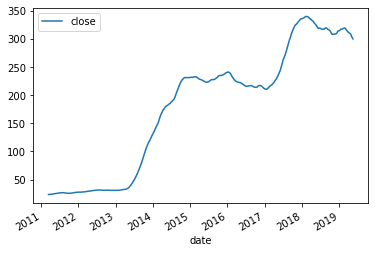

In [44]:
stock_price_df.rolling(window=180).mean().plot()

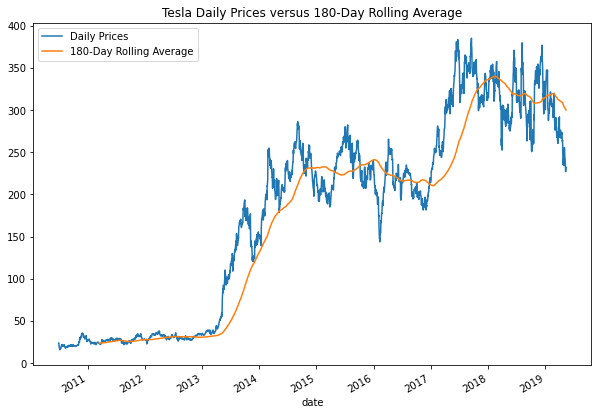

In [45]:
# Set the plot of Tesla's daily prices as the main plot in the overlay
ax = tsla_df.plot(figsize=(10,7), title="Tesla Daily Prices versus 180-Day Rolling Average")

# Plot the 180-day rolling metric as an overlay on the plot
tsla_df.rolling(window=180).mean().plot(ax=ax)

# Create the legend for the figure
ax.legend(["Daily Prices", "180-Day Rolling Average"])


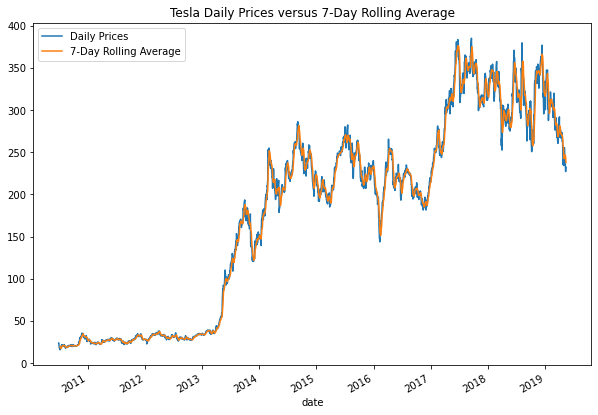

In [46]:
# Set the plot of Tesla's daily prices as the main plot in the overlay
ax = tsla_df.plot(figsize=(10, 7), title="Tesla Daily Prices versus 7-Day Rolling Average")

# Plot the 7-day rolling metric as an overlay on the plot
tsla_df.rolling(window=7).mean().plot(ax=ax)

# Create the legend for the figure
ax.legend(["Daily Prices", "7-Day Rolling Average"])


<AxesSubplot:title={'center':'Tesla Daily Prices - 30-Day Rolling Standard Deviation'}, xlabel='date'>

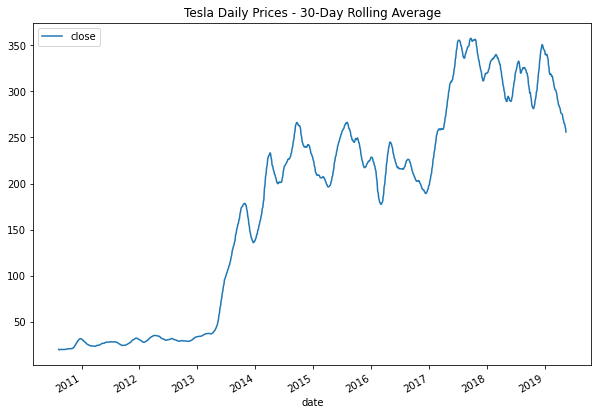

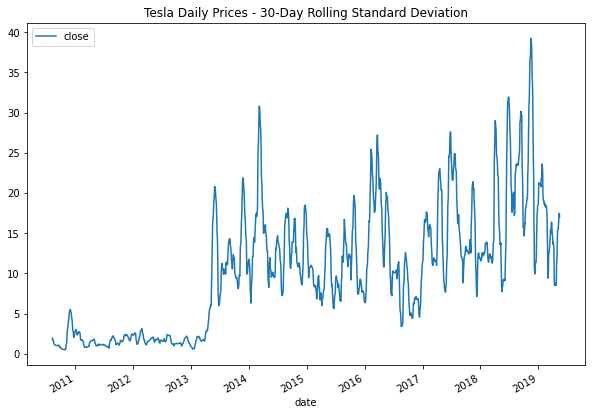

In [47]:
# Plot a rolling 30-day mean of TSLA's closing prices
tsla_df.rolling(window=30).mean().plot(
    figsize=(10, 7),
    title="Tesla Daily Prices - 30-Day Rolling Average"
)

# Plot a rolling 30-day standard deviation of TSLA's closing prices
tsla_df.rolling(window=30).std().plot(
    figsize=(10, 7),
    title="Tesla Daily Prices - 30-Day Rolling Standard Deviation"
)


<AxesSubplot:title={'center':'Tesla Daily Prices - 180-Day Rolling Standard Deviation'}, xlabel='date'>

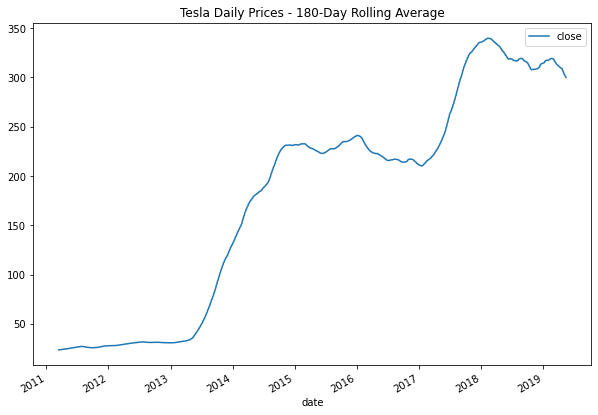

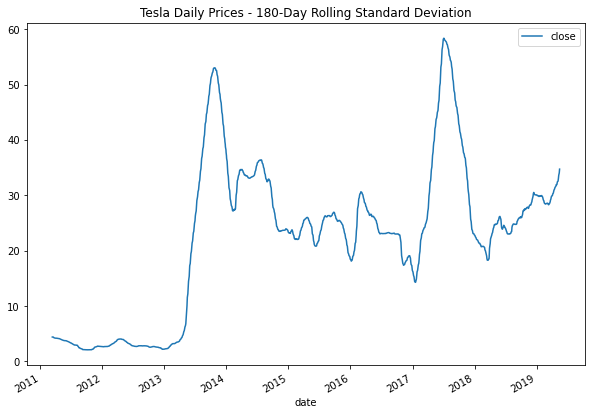

In [48]:
# Plot a rolling 180-day mean of TSLA's closing prices
tsla_df.rolling(window=180).mean().plot(
    figsize=(10, 7),
    title="Tesla Daily Prices - 180-Day Rolling Average"
)

# Plot a rolling 180-day standard deviation of TSLAs closing prices
tsla_df.rolling(window=180).std().plot(
    figsize=(10, 7),
    title="Tesla Daily Prices - 180-Day Rolling Standard Deviation"
)
